In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#Load the dataset
df = pd.read_csv("IMDB Top 250 Movies.csv")
df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


# Getting basic info about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [ ]:
df.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


# Feature Engineering

## Budget

In [ ]:
set(df['budget'])

{'$3300000',
 '$8240000',
 '1000000',
 '10000000',
 '100000000',
 '102000000',
 '103000000',
 '11000000',
 '11400000',
 '11500000',
 '115000000',
 '1200000',
 '12000000',
 '125000000',
 '1288000',
 '1300000',
 '13000000',
 '133000',
 '13500000',
 '1400000',
 '140000000',
 '14400000',
 '14600000',
 '150000',
 '1500000',
 '15000000',
 '150000000',
 '160000000',
 '16400000',
 '165000000',
 '170000000',
 '17500000',
 '175000000',
 '1752000',
 '1800000',
 '18000000',
 '180000000',
 '18500000',
 '185000000',
 '1900000',
 '19000000',
 '2000000',
 '20000000',
 '200000000',
 '2100000',
 '2200000',
 '22000000',
 '229575',
 '23000000',
 '24000000',
 '2400000000',
 '2479000',
 '250000',
 '2500000',
 '25000000',
 '250000000',
 '2540800',
 '2777000',
 '2800000',
 '28000000',
 '2883848',
 '3000000',
 '30000000',
 '3101000',
 '31500000',
 '3180000',
 '3200000',
 '321000000',
 '325000',
 '32500000',
 '3300000',
 '33000000',
 '350000',
 '35000000',
 '356000000',
 '3700000',
 '3800000',
 '38000000',
 '39

In [ ]:
#converting all the currency in dollar and only keeping numeric value

def convert_currency(value):
  if "DEM" in value:
    value = value.replace('DEM\xa0','')
    value = float(value)*0.54
  elif "FRF" in value:
    value = value.replace('FRF\xa0','')
    value = float(value)*0.16
  return value

In [ ]:
#removing the $ sign from the value

df['budget'] = df['budget'].str.replace('$','')
df['budget'] = df['budget'].apply(convert_currency)
df['budget'] = pd.to_numeric(df['budget'], 
                             errors='coerce', 
                             downcast='float')

<ipython-input-7-efbd7d0adaa6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['budget'] = df['budget'].str.replace('$','')


## Box Office Collection

In [ ]:
set(df['box_office'])

{'1006234167',
 '101209702',
 '104880868',
 '106285522',
 '1067316101',
 '1074458282',
 '1081169825',
 '109114817',
 '109676311',
 '1098',
 '1109802321',
 '1146457748',
 '11477',
 '11487676',
 '116112375',
 '1166717',
 '117250402',
 '120072577',
 '12180',
 '122126687',
 '1226507',
 '126216940',
 '127244',
 '13019063',
 '131060248',
 '1342359942',
 '134686457',
 '1349711',
 '135342',
 '138545632',
 '141603197',
 '142319',
 '144738',
 '14480',
 '14651',
 '1488732821',
 '15000000',
 '151052',
 '15421226',
 '156000000',
 '159167799',
 '159428329',
 '162861289',
 '1645133',
 '16767475',
 '170005875',
 '171627434',
 '173082189',
 '1740429',
 '174122191',
 '180563636',
 '180906076',
 '187436818',
 '187733202',
 '18778738',
 '1921847111',
 '1940906',
 '195088',
 '19569225',
 '19632715',
 '199632',
 '2000288',
 '2052415039',
 '20745728',
 '20908467',
 '213216216',
 '213928762',
 '216639112',
 '216763646',
 '21897373',
 '225508210',
 '228178',
 '22926076',
 '230098753',
 '23308615',
 '23335817',

In [ ]:
#removing the estimated and taking float value

df['box_office'] = df['box_office'].str.replace('(estimated)','')
df['box_office'] = pd.to_numeric(df['box_office'], 
                             errors='coerce', 
                             downcast='integer')

<ipython-input-9-2b5a04f1e8bd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['box_office'] = df['box_office'].str.replace('(estimated)','')


## Run Time

In [ ]:
#converting the run-time of movies into minutes

def convert_to_minutes(time):
  try:
    total_minutes = 0
    if 'h' in time:
      time = time.split('h')
      hours = int(time[0])
      mins = int(time[1][:-1]) if time[1][:-1].strip().isdigit() else 0
      total_minutes = hours*60 + mins
    else:
        total_minutes = int(time[:-1])
    return total_minutes
  except ValueError:
    return float('NaN')

In [ ]:
df['run_time'] = df['run_time'].apply(convert_to_minutes)

In [ ]:
#splitting genre, directors, writers and casts and made a list

df['genre'] = df['genre'].str.split(",")   #genre
df['directors'] = df['directors'].str.split(",")   #directors
df['writers'] = df['writers'].str.split(",")    #writers
df['casts'] = df['casts'].str.split(",")       #casts

In [ ]:
df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,[Drama],R,142.0,Fear can hold you prisoner. Hope can set you f...,25000000.0,2.888450e+07,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[Frank Darabont],"[Stephen King, Frank Darabont]"
1,2,The Godfather,1972,9.2,"[Crime, Drama]",R,175.0,An offer you can't refuse.,6000000.0,2.503418e+08,"[Marlon Brando, Al Pacino, James Caan, Diane K...",[Francis Ford Coppola],"[Mario Puzo, Francis Ford Coppola]"
2,3,The Dark Knight,2008,9.0,"[Action, Crime, Drama]",PG-13,152.0,Why So Serious?,185000000.0,1.006234e+09,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Jonathan Nolan, Christopher Nolan, David S. G..."
3,4,The Godfather Part II,1974,9.0,"[Crime, Drama]",R,202.0,All the power on earth can't change destiny.,13000000.0,4.796192e+07,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...",[Francis Ford Coppola],"[Francis Ford Coppola, Mario Puzo]"
4,5,12 Angry Men,1957,9.0,"[Crime, Drama]",Approved,96.0,Life Is In Their Hands -- Death Is On Their Mi...,350000.0,9.550000e+02,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John...",[Sidney Lumet],[Reginald Rose]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     249 non-null    float64
 7   tagline      250 non-null    object 
 8   budget       211 non-null    float32
 9   box_office   217 non-null    float64
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float32(1), float64(3), int64(2), object(7)
memory usage: 24.5+ KB


In [ ]:
df.describe()

,rank,year,rating,run_time,budget,box_office
count,250.000000,250.000000,250.000000,249.000000,2.110000e+02,2.170000e+02
mean,125.500000,1986.360000,8.307200,129.052209,5.189757e+07,2.382076e+08
std,72.312977,25.125356,0.229081,30.223383,1.758636e+08,3.825392e+08
min,1.000000,1921.000000,8.000000,45.000000,1.330000e+05,6.700000e+01
25%,63.250000,1966.250000,8.100000,107.000000,3.050500e+06,8.574081e+06
50%,125.500000,1994.000000,8.200000,126.000000,1.500000e+07,7.403672e+07
75%,187.750000,2006.000000,8.400000,145.000000,4.700000e+07,3.217527e+08
max,250.000000,2022.000000,9.300000,238.000000,2.400000e+09,2.799439e+09


# EDA (Exploratory Data Analysis)

## What are the popular genres of Top 250 movies?

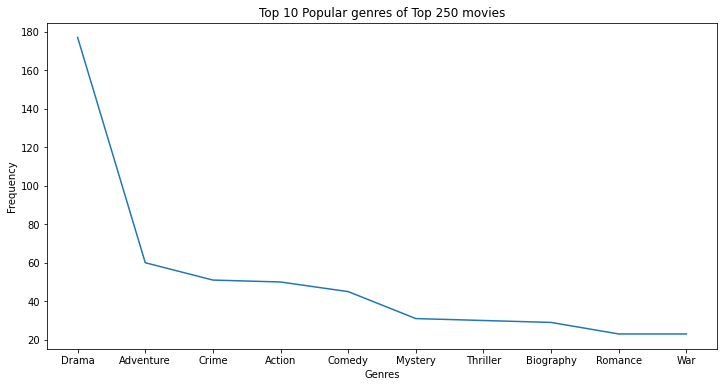

In [ ]:
diff_genres_count = df['genre'].explode().value_counts()
plt.figure(figsize=(12, 6))
plt.plot(diff_genres_count[:10])
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.title("Top 10 Popular genres of Top 250 movies")
plt.show()

## How does ratings vary across the genres?

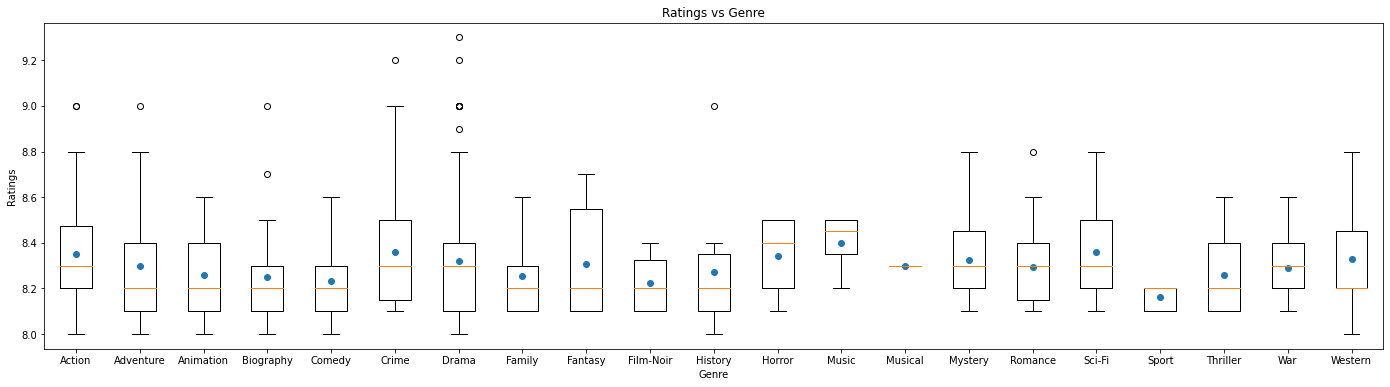

In [ ]:
rating_per_genre = df[['genre', 'rating']].explode('genre').groupby('genre')
genre_rating_dict = rating_per_genre['rating'].apply(list).to_dict()
grouped_data = list(genre_rating_dict.values())
mean_rating_per_genre = rating_per_genre.mean()
plt.figure(figsize=(24, 6))
plt.boxplot(grouped_data)
plt.plot(range(1, len(genre_rating_dict) + 1), mean_rating_per_genre, 'o')
plt.xticks(range(1, len(genre_rating_dict) + 1), list(genre_rating_dict.keys()))
plt.xlabel("Genre")
plt.ylabel("Ratings")
plt.title("Ratings vs Genre")
plt.show()



```
     Q1-1.5IQR   Q1       median mean   Q3   Q3+1.5IQR
                  |---------:-----------|
  o      |--------|         :     o     |--------|    o  o
                  |---------:-----------|
flier             <--------------------->            fliers
                            IQR
```



## What were the categories of Top 250 Movies?

There are several box office categories but there is no specific formula or threshold for determining the categories. Instead, the categories are based on industry standards and expectations, as well as the production budget and marketing costs of the movie. For the sake of simplicity, we're using the following formula in comparision to their budget.


* **All time Blockbuster**: Above 300%
* **Blockbuster**: 200%-300%
* **Super Hit**: 175%-200%
* **Hit**: 125%-175%
* **Average**: 100%-125%
* **Flop**: 75%-100%
* **Super Flop**: 50%-75%
* **Disaster**: Below 50%

In [ ]:
#categorising on the basis of ROI

def convert_to_categories(roi):
  if roi > 3.0:
    return "All Time Blockbuster"
  elif roi > 2.0:
    return "Blockbuster"
  elif roi > 1.75:
    return "Super Hit"
  elif roi > 1.25:
    return "Hit"
  elif roi > 1.0:
    return "Average"
  elif roi > 0.75:
    return "Flop"
  elif roi > 0.5:
    return "Super Flop"
  else:
    return "Disaster"

In [ ]:
#calculated roi(return of investment)
df['roi'] = df['box_office']/df['budget']         #formula for ROI
df['box-office-status'] = df['roi'].apply(convert_to_categories)
df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,roi,box-office-status
0,1,The Shawshank Redemption,1994,9.3,[Drama],R,142.0,Fear can hold you prisoner. Hope can set you f...,25000000.0,2.888450e+07,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[Frank Darabont],"[Stephen King, Frank Darabont]",1.155380,Average
1,2,The Godfather,1972,9.2,"[Crime, Drama]",R,175.0,An offer you can't refuse.,6000000.0,2.503418e+08,"[Marlon Brando, Al Pacino, James Caan, Diane K...",[Francis Ford Coppola],"[Mario Puzo, Francis Ford Coppola]",41.723636,All Time Blockbuster
2,3,The Dark Knight,2008,9.0,"[Action, Crime, Drama]",PG-13,152.0,Why So Serious?,185000000.0,1.006234e+09,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],"[Jonathan Nolan, Christopher Nolan, David S. G...",5.439104,All Time Blockbuster
3,4,The Godfather Part II,1974,9.0,"[Crime, Drama]",R,202.0,All the power on earth can't change destiny.,13000000.0,4.796192e+07,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...",[Francis Ford Coppola],"[Francis Ford Coppola, Mario Puzo]",3.689378,All Time Blockbuster
4,5,12 Angry Men,1957,9.0,"[Crime, Drama]",Approved,96.0,Life Is In Their Hands -- Death Is On Their Mi...,350000.0,9.550000e+02,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John...",[Sidney Lumet],[Reginald Rose],0.002729,Disaster


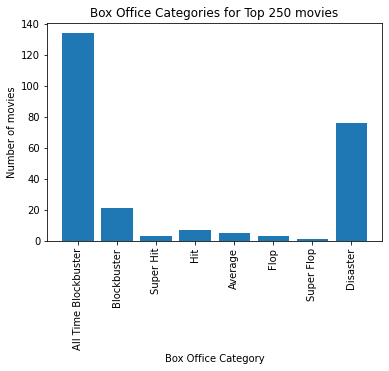

In [ ]:
#plotting according to its success rate

xticks = ["All Time Blockbuster", "Blockbuster", "Super Hit", "Hit", "Average", "Flop", "Super Flop", "Disaster"]
box_office_status = df['box-office-status'].value_counts()
box_office_status = box_office_status.reindex(xticks)
plt.bar(box_office_status.keys(), box_office_status.values)
plt.xlabel("Box Office Category")
plt.ylabel("Number of movies")
plt.xticks(rotation="vertical")
plt.title("Box Office Categories for Top 250 movies")
plt.show()

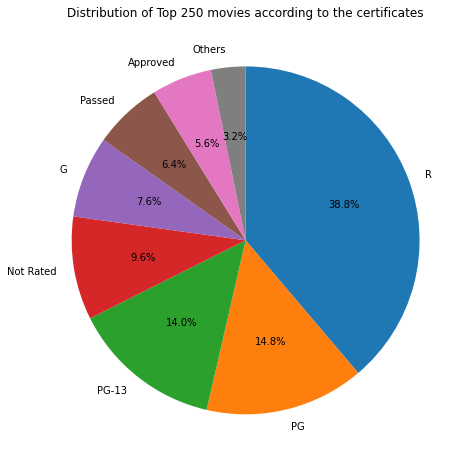

In [ ]:
#distribution according to the certificates

movie_certs = df['certificate'].value_counts()
others_count = movie_certs[movie_certs < 5].sum()
movie_certs = movie_certs.drop(movie_certs[movie_certs < 5].index.tolist())
movie_certs['Others'] = others_count
plt.figure(figsize=(8, 8))
plt.pie(movie_certs, \
        labels=movie_certs.keys(), \
        startangle = 90, \
        autopct='%1.1f%%', \
        counterclock=False)
plt.title("Distribution of Top 250 movies according to the certificates")
plt.show()

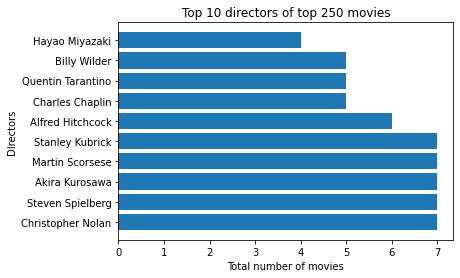

In [ ]:
#top-10 directors plotted

best_directors = df['directors'].explode().value_counts()
plt.barh(best_directors.keys()[:10], best_directors.values[:10])
plt.ylabel("DIrectors")
plt.xlabel("Total number of movies")
plt.title("Top 10 directors of top 250 movies")
# plt.plot(best_directors[:5])
plt.show()

In [ ]:
dir_probs = best_directors/250
cast_probs = df['casts'].explode().value_counts()/250
writer_probs = df['writers'].explode().value_counts()/250
certs_probs = movie_certs/250
genre_probs = diff_genres_count/250

#calculated probability ... applied regression 

def convert_genres(genres):
  genre_factor = -0.06
  genre_prob = 0
  for genre in genres:
    genre_prob += genre_probs[genre] if genre in genre_probs else genre_factor

  return genre_prob


def convert_certificate(certificate):
  return certs_probs[certificate] if certificate in certs_probs\
   else certs_probs['Others']

def convert_directors(directors):
  dir_factor = -0.02
  dir_prob = 0
  for director in directors:
    dir_prob += dir_probs[director] if director in dir_probs else dir_factor

  return dir_prob

def convert_casts(casts):
  cast_factor = -0.015
  cast_prob = 0
  for cast in casts:
    cast_prob += cast_probs[cast] if cast in cast_probs else cast_factor

  return cast_prob

def convert_writers(writers):
  writer_factor = -0.007
  writer_prob = 0
  for writer in writers:
    writer_prob += writer_probs[writer] if writer in writer_probs else writer_factor

  return writer_prob

regression_df = df.copy()
regression_df['genre'] = regression_df['genre'].apply(convert_genres)
regression_df['certificate'] = regression_df['certificate'].apply(convert_certificate)
regression_df['directors'] = regression_df['directors'].apply(convert_directors)
regression_df['casts'] = regression_df['casts'].apply(convert_casts)
regression_df['writers'] = regression_df['writers'].apply(convert_writers)

regression_df['run_time'] = regression_df['run_time'].fillna(regression_df['run_time'].mean())
regression_df['budget'] = regression_df['budget'].fillna(regression_df['run_time'].median())
regression_df['box_office'] = regression_df['box_office'].fillna(regression_df['run_time'].mode()[0])
regression_df['roi'] = regression_df['box_office']/regression_df['budget']
regression_df = regression_df.drop(columns=['name', 'rank', 'tagline', 'box-office-status'], axis=1)

regression_df.head()

,year,rating,genre,certificate,run_time,budget,box_office,casts,directors,writers,roi
0,1994,9.3,0.708,0.388,142.0,25000000.0,2.888450e+07,0.116,0.008,0.024,1.155380
1,1972,9.2,0.912,0.388,175.0,6000000.0,2.503418e+08,0.144,0.012,0.020,41.723636
2,2008,9.0,1.112,0.140,152.0,185000000.0,1.006234e+09,0.164,0.028,0.060,5.439104
3,1974,9.0,0.912,0.388,202.0,13000000.0,4.796192e+07,0.172,0.012,0.020,3.689378
4,1957,9.0,0.912,0.056,96.0,350000.0,9.550000e+02,0.112,0.008,0.004,0.002729


In [ ]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         250 non-null    int64  
 1   rating       250 non-null    float64
 2   genre        250 non-null    float64
 3   certificate  250 non-null    float64
 4   run_time     250 non-null    float64
 5   budget       250 non-null    float32
 6   box_office   250 non-null    float64
 7   casts        250 non-null    float64
 8   directors    250 non-null    float64
 9   writers      250 non-null    float64
 10  roi          250 non-null    float64
dtypes: float32(1), float64(9), int64(1)
memory usage: 20.6 KB


In [ ]:
#calculated the accuracy

def count_accuracy(y_true, y_pred):
  threshold = 0.2
  count = 0
  for i in range(len(y_true)):
    if abs(y_true[i]-y_pred[i]) < threshold:
      count += 1
  return count/len(y_true)

## Test

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Define the model
model = LinearRegression()
y = np.array(regression_df['rating'])
x = np.array(regression_df.loc[:, regression_df.columns!='rating'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True)
reg = model.fit(X_train, y_train)
y_pred = reg.predict(X_test)
accuracy = count_accuracy(y_test, y_pred)
#Printed the accuracy
print(accuracy)

0.631578947368421


In [ ]:
from sklearn.svm import SVR
#Define the model
model = SVR()
y = np.array(regression_df['rating'])
x = np.array(regression_df.loc[:, regression_df.columns!='rating'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True)
reg = model.fit(X_train, y_train)
y_pred = reg.predict(X_test)
accuracy = count_accuracy(y_test, y_pred)
#Printed the accuracy
print(accuracy)

0.7894736842105263
